<a href="https://colab.research.google.com/github/Shovon198915/CSE475/blob/main/lab/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [1]:
!gdown --id 1nLdjq_y0hJ4_A-kH6MZb9x-GDk4sNrRY

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nLdjq_y0hJ4_A-kH6MZb9x-GDk4sNrRY
To: /content/adult.csv
100% 4.10M/4.10M [00:00<00:00, 233MB/s]


# Preprocessing and Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/adult.csv'
df = pd.read_csv(file_path)

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# Replace '?' with NaN for handling missing values
df.replace(' ?', pd.NA, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Drop the 'income' column as it is not needed for unsupervised learning
df_unsupervised = df.drop(columns=['income'])

# Split the features into categorical and numerical
categorical_features = df_unsupervised.select_dtypes(include=['object']).columns
numerical_features = df_unsupervised.select_dtypes(include=['int64', 'float64']).columns

# Standard scaling for numerical features only
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(df_unsupervised[numerical_features])

# One-hot encoding for categorical features only
encoder = OneHotEncoder(drop='first')
encoded_categorical_data = encoder.fit_transform(df_unsupervised[categorical_features])

# Concatenate the scaled numerical and encoded categorical data
processed_data = np.hstack([scaled_numerical_data, encoded_categorical_data.toarray()])

# Convert to DataFrame with appropriate column names
final_columns = numerical_features.tolist() + encoder.get_feature_names_out(categorical_features).tolist()
final_df = pd.DataFrame(processed_data, columns=final_columns)

final_df.to_csv('processed_data.csv', index=False)

final_df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Apply Clustering

In [4]:
!gdown --id 1cO2SQHvkg1SWUJgk4FU_mVx_l_NSnrn8

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cO2SQHvkg1SWUJgk4FU_mVx_l_NSnrn8
To: /content/processed_data_adults.csv
100% 16.2M/16.2M [00:00<00:00, 74.4MB/s]


In [5]:
# Load the newly provided dataset
file_path = '/content/processed_data_adults.csv'
processed_data_df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
processed_data_df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


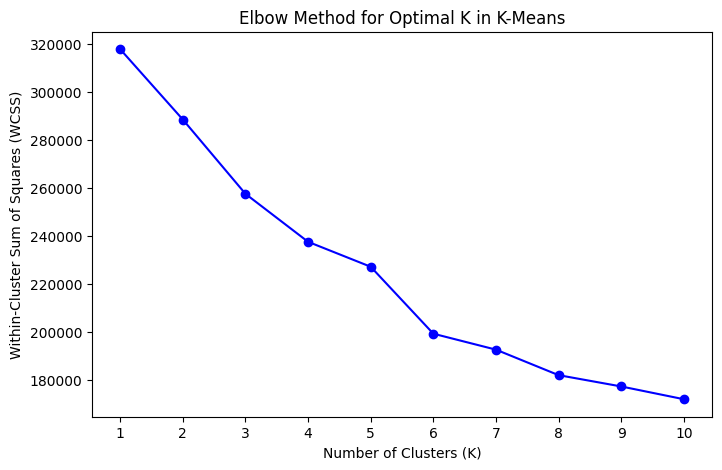

In [6]:
# Calculate WCSS for a range of K values to use the Elbow Method
wcss = []
k_range = range(1, 11)  # Range of K values from 1 to 10

# Iterate through each k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data_df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K in K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_range)
plt.show()

In [7]:
# Define number of clusters for K-Means
n_clusters = 8

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, max_iter=30, random_state=42)
processed_data_df['KMeans_Cluster'] = kmeans.fit_predict(processed_data_df)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
processed_data_df['DBSCAN_Cluster'] = dbscan.fit_predict(processed_data_df)

# PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster']))
processed_data_df['PCA1'] = pca_result[:, 0]
processed_data_df['PCA2'] = pca_result[:, 1]

# Calculate evaluation scores
data = processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2'])
silhouette_kmeans = silhouette_score(data,
                                     processed_data_df['KMeans_Cluster'])
silhouette_dbscan = silhouette_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                     processed_data_df['DBSCAN_Cluster'])
dbi_kmeans = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                  processed_data_df['KMeans_Cluster'])
dbi_dbscan = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                  processed_data_df['DBSCAN_Cluster'])

# Print evaluation scores
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
print(f"Davies-Bouldin Index (K-Means): {dbi_kmeans}")
print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan}")


Silhouette Score (K-Means): 0.11291068593154656
Silhouette Score (DBSCAN): -0.35967866846296004
Davies-Bouldin Index (K-Means): 1.7971096790402077
Davies-Bouldin Index (DBSCAN): 1.5325296537985769
